In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv("./bank.csv", delimiter=";")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df['marital'].describe()

count        4521
unique          3
top       married
freq         2797
Name: marital, dtype: object

In [8]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [9]:
le_marital = LabelEncoder()
df['marital'] = le_marital.fit_transform(df['marital'])
print(le_marital.classes_)
df['marital']

['divorced' 'married' 'single']


0       1
1       1
2       2
3       1
4       1
       ..
4516    1
4517    1
4518    1
4519    1
4520    2
Name: marital, Length: 4521, dtype: int64

In [10]:
df['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [11]:
le_job = LabelEncoder()
df['job'] = le_job.fit_transform(df['job'])
print(le_job.classes_)
df['job']

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']


0       10
1        7
2        4
3        4
4        1
        ..
4516     7
4517     6
4518     9
4519     1
4520     2
Name: job, Length: 4521, dtype: int64

In [12]:
df['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [13]:
le_education = LabelEncoder()
df['education'] = le_education.fit_transform(df['education'])
print(le_education.classes_)
df['education']

['primary' 'secondary' 'tertiary' 'unknown']


0       0
1       1
2       2
3       2
4       1
       ..
4516    1
4517    2
4518    1
4519    1
4520    2
Name: education, Length: 4521, dtype: int64

In [14]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [15]:
df['default'].replace(['no', 'yes'], [0, 1], inplace=True)
print(df['default'])

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    1
4518    0
4519    0
4520    0
Name: default, Length: 4521, dtype: int64


In [16]:
df['housing'].unique()

array(['no', 'yes'], dtype=object)

In [17]:
df['housing'].replace(['no', 'yes'], [0, 1], inplace=True)
print(df['housing'])

0       0
1       1
2       1
3       1
4       1
       ..
4516    1
4517    1
4518    0
4519    0
4520    1
Name: housing, Length: 4521, dtype: int64


In [18]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [19]:
df['loan'].replace(['no', 'yes'], [0, 1], inplace=True)
print(df['loan'])

0       0
1       1
2       0
3       1
4       0
       ..
4516    0
4517    1
4518    0
4519    0
4520    1
Name: loan, Length: 4521, dtype: int64


In [20]:
df['contact'].unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

In [21]:
le_contact = LabelEncoder()
df['contact'] = le_contact.fit_transform(df['contact'])
print(le_contact.classes_)
df['contact']

['cellular' 'telephone' 'unknown']


0       0
1       0
2       0
3       2
4       2
       ..
4516    0
4517    2
4518    0
4519    0
4520    0
Name: contact, Length: 4521, dtype: int64

In [22]:
df['month'].unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [23]:
le_month = LabelEncoder()
df['month'] = le_month.fit_transform(df['month'])
print(le_month.classes_)
df['month']

['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']


0       10
1        8
2        0
3        6
4        8
        ..
4516     5
4517     8
4518     1
4519     3
4520     0
Name: month, Length: 4521, dtype: int64

In [24]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [25]:
le_poutcome = LabelEncoder()
df['poutcome'] = le_poutcome.fit_transform(df['poutcome'])
print(le_poutcome.classes_)
df['poutcome']

['failure' 'other' 'success' 'unknown']


0       3
1       0
2       0
3       3
4       3
       ..
4516    3
4517    3
4518    3
4519    1
4520    1
Name: poutcome, Length: 4521, dtype: int64

In [26]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,no
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,no
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,no
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,no
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,no


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   int64 
 2   marital    4521 non-null   int64 
 3   education  4521 non-null   int64 
 4   default    4521 non-null   int64 
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   int64 
 7   loan       4521 non-null   int64 
 8   contact    4521 non-null   int64 
 9   day        4521 non-null   int64 
 10  month      4521 non-null   int64 
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   int64 
 16  y          4521 non-null   object
dtypes: int64(16), object(1)
memory usage: 600.6+ KB


In [28]:
df.shape

(4521, 17)

In [29]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [30]:
X.shape, y.shape

((4521, 16), (4521,))

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234)

In [32]:
print(f"{X_train.shape=}\n{y_train.shape=}\n\n{X_test.shape=}\n{y_test.shape=}")

X_train.shape=(3390, 16)
y_train.shape=(3390,)

X_test.shape=(1131, 16)
y_test.shape=(1131,)


In [33]:
dtc = DecisionTreeClassifier()

In [34]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
y_pred_test = dtc.predict(X_test)
y_pred_train = dtc.predict(X_train)

In [42]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00      3003
         yes       1.00      1.00      1.00       387

    accuracy                           1.00      3390
   macro avg       1.00      1.00      1.00      3390
weighted avg       1.00      1.00      1.00      3390



In [47]:
confusion_matrix(y_train, y_pred_train)

array([[3003,    0],
       [   0,  387]])

In [45]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          no       0.92      0.92      0.92       997
         yes       0.37      0.37      0.37       134

    accuracy                           0.85      1131
   macro avg       0.64      0.64      0.64      1131
weighted avg       0.85      0.85      0.85      1131



In [46]:
confusion_matrix(y_test, y_pred_test)

array([[913,  84],
       [ 84,  50]])

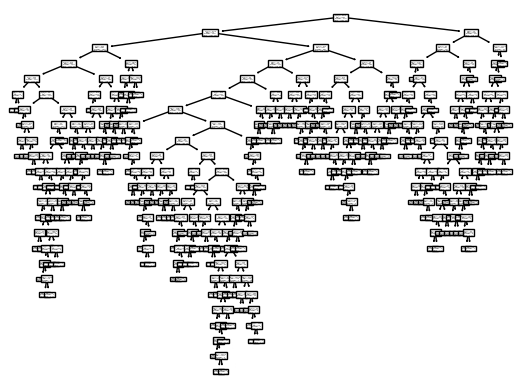

<Figure size 640x480 with 0 Axes>

In [54]:
import matplotlib.pyplot as plt

plot_tree(dtc)
plt.show()
plt.savefig("as")

In [53]:
dtc.get_depth(), dtc.get_n_leaves()

(23, 239)

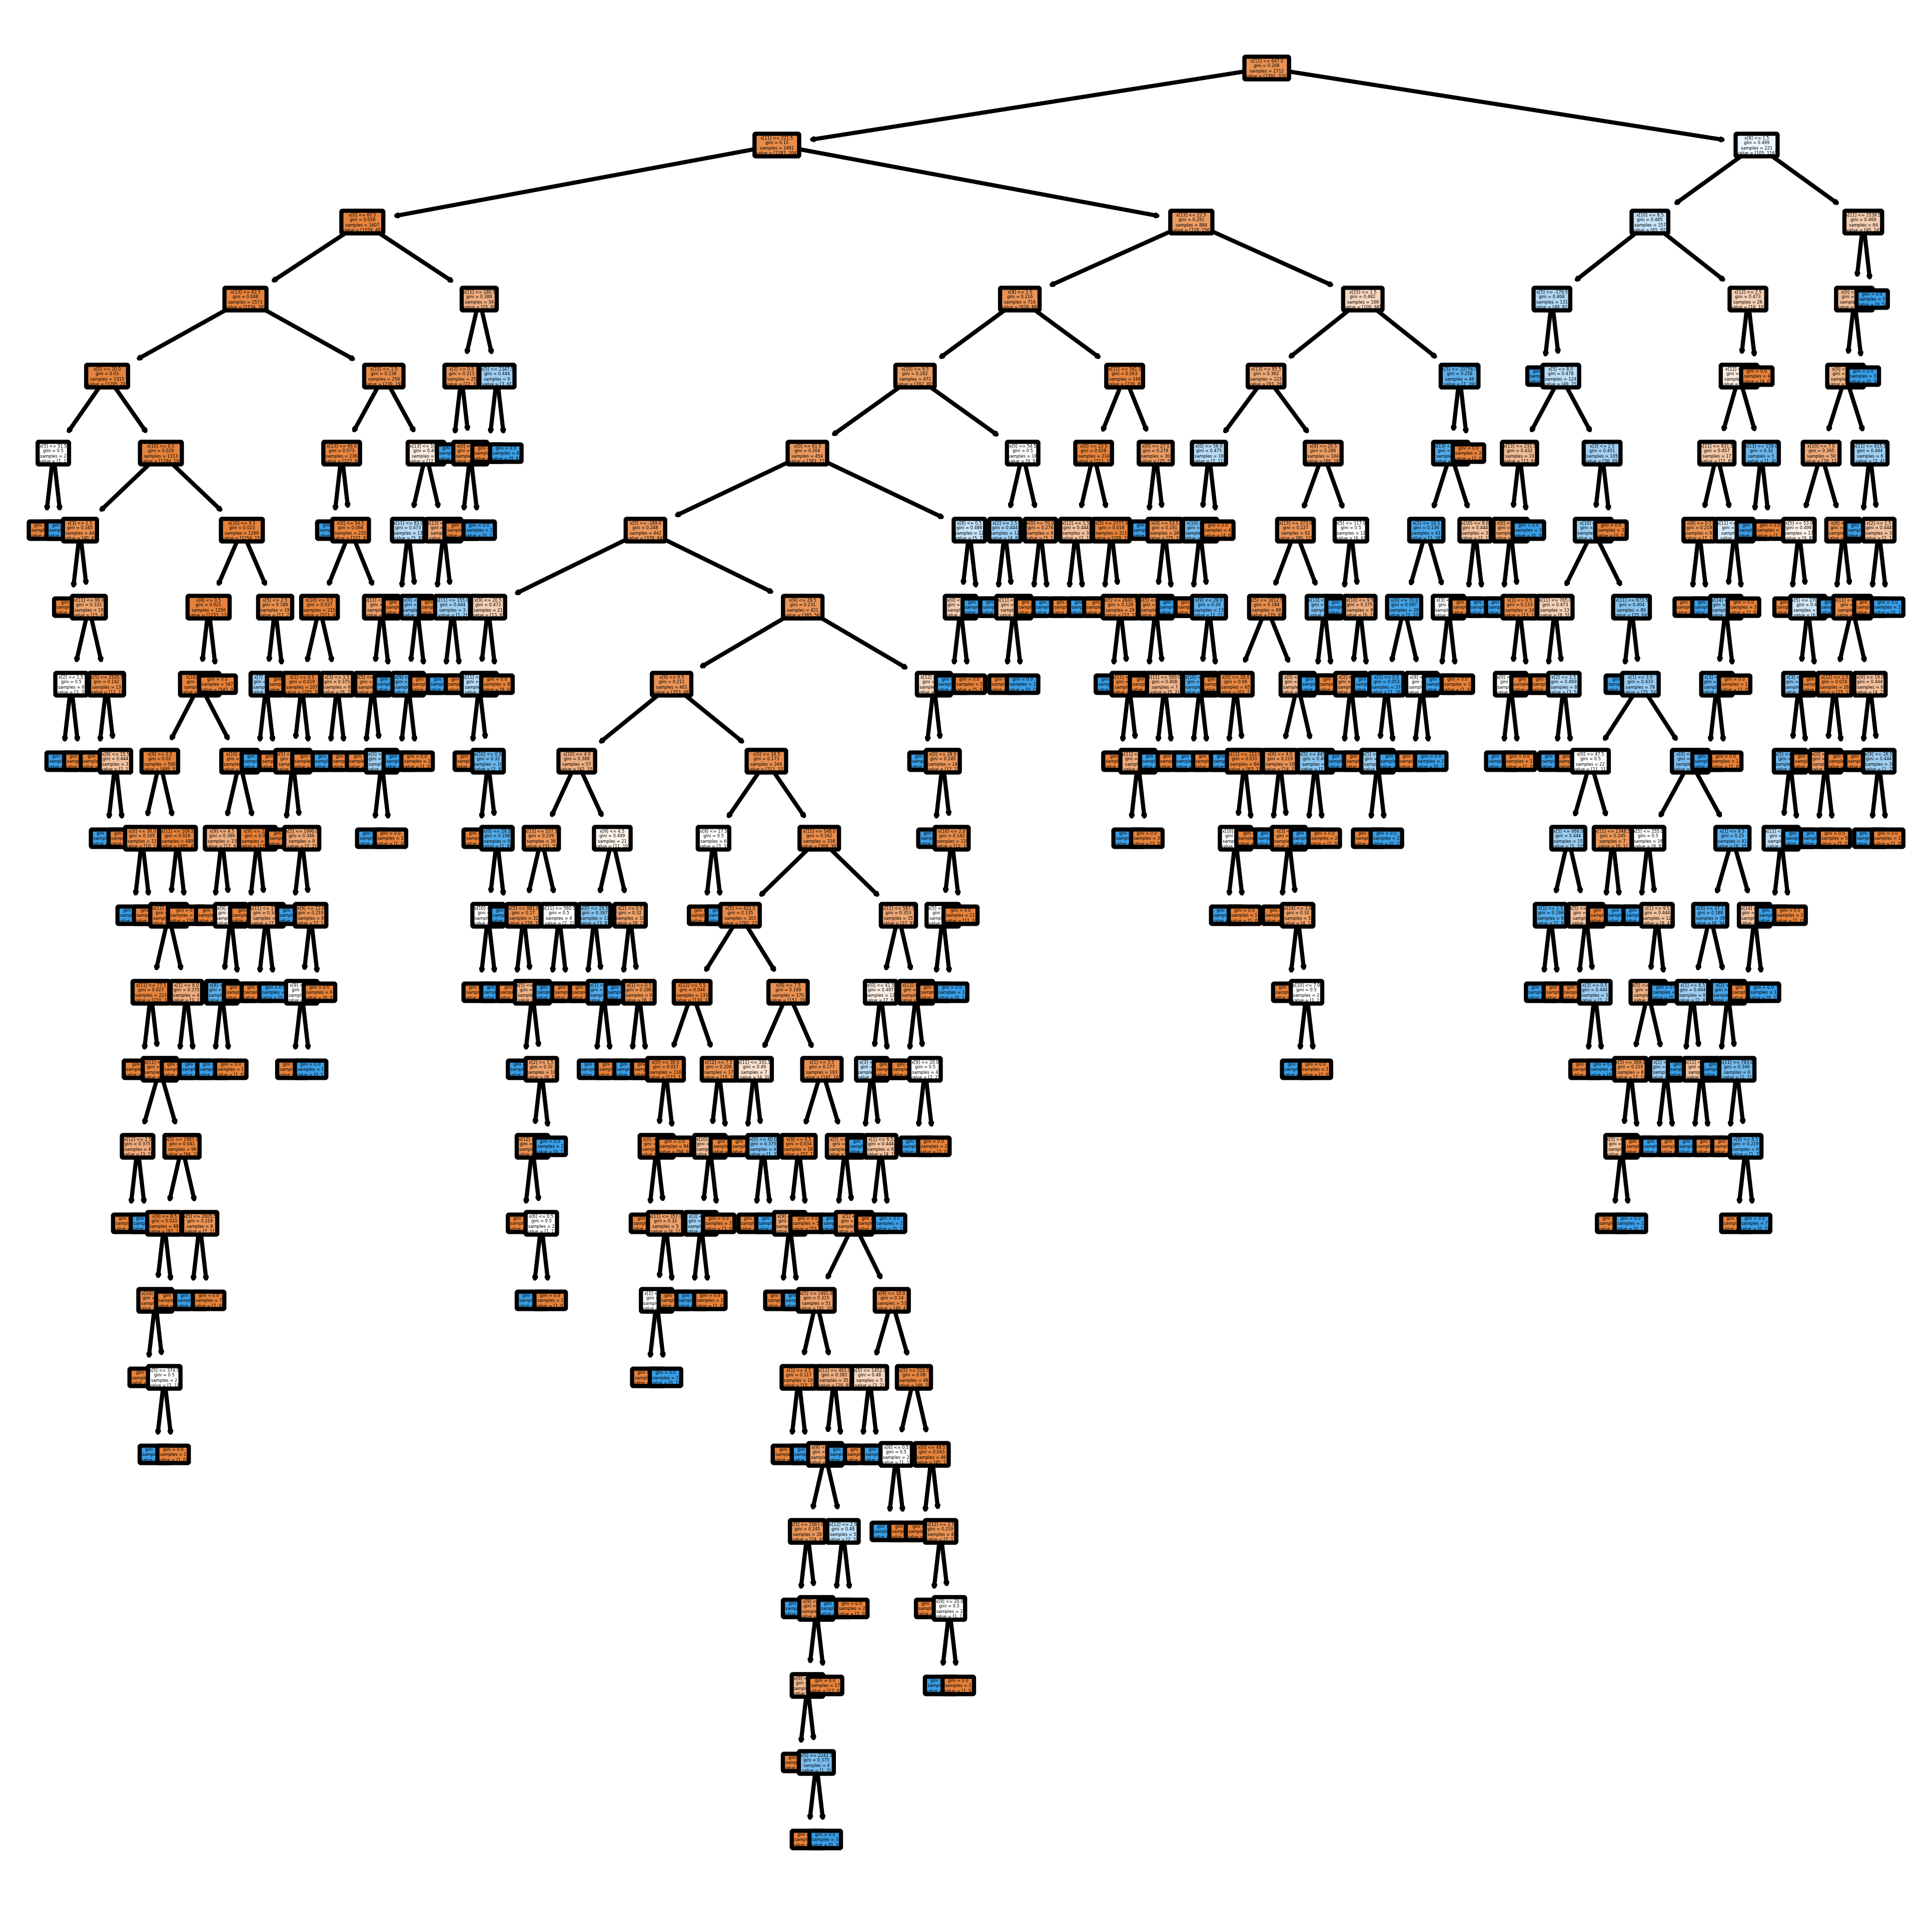

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8), dpi=600)
plot_tree(dtc, filled=True, rounded=True, ax=axes)
plt.savefig('tree.svg')

In [57]:
dtc_1 = DecisionTreeClassifier(max_depth=5)

In [58]:
dtc_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [60]:
y_pred_test = dtc_1.predict(X_test)
y_pred_train = dtc_1.predict(X_train)

In [61]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          no       0.92      0.97      0.94      1608
         yes       0.53      0.32      0.40       201

    accuracy                           0.89      1809
   macro avg       0.73      0.64      0.67      1809
weighted avg       0.88      0.89      0.88      1809



In [62]:
confusion_matrix(y_test, y_pred_test)

array([[1552,   56],
       [ 137,   64]])

In [64]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

          no       0.93      0.98      0.95      2392
         yes       0.75      0.47      0.58       320

    accuracy                           0.92      2712
   macro avg       0.84      0.72      0.77      2712
weighted avg       0.91      0.92      0.91      2712



In [65]:
confusion_matrix(y_train, y_pred_train)

array([[2341,   51],
       [ 170,  150]])

In [67]:
dtc_1.get_depth(), dtc_1.get_n_leaves()

(5, 26)

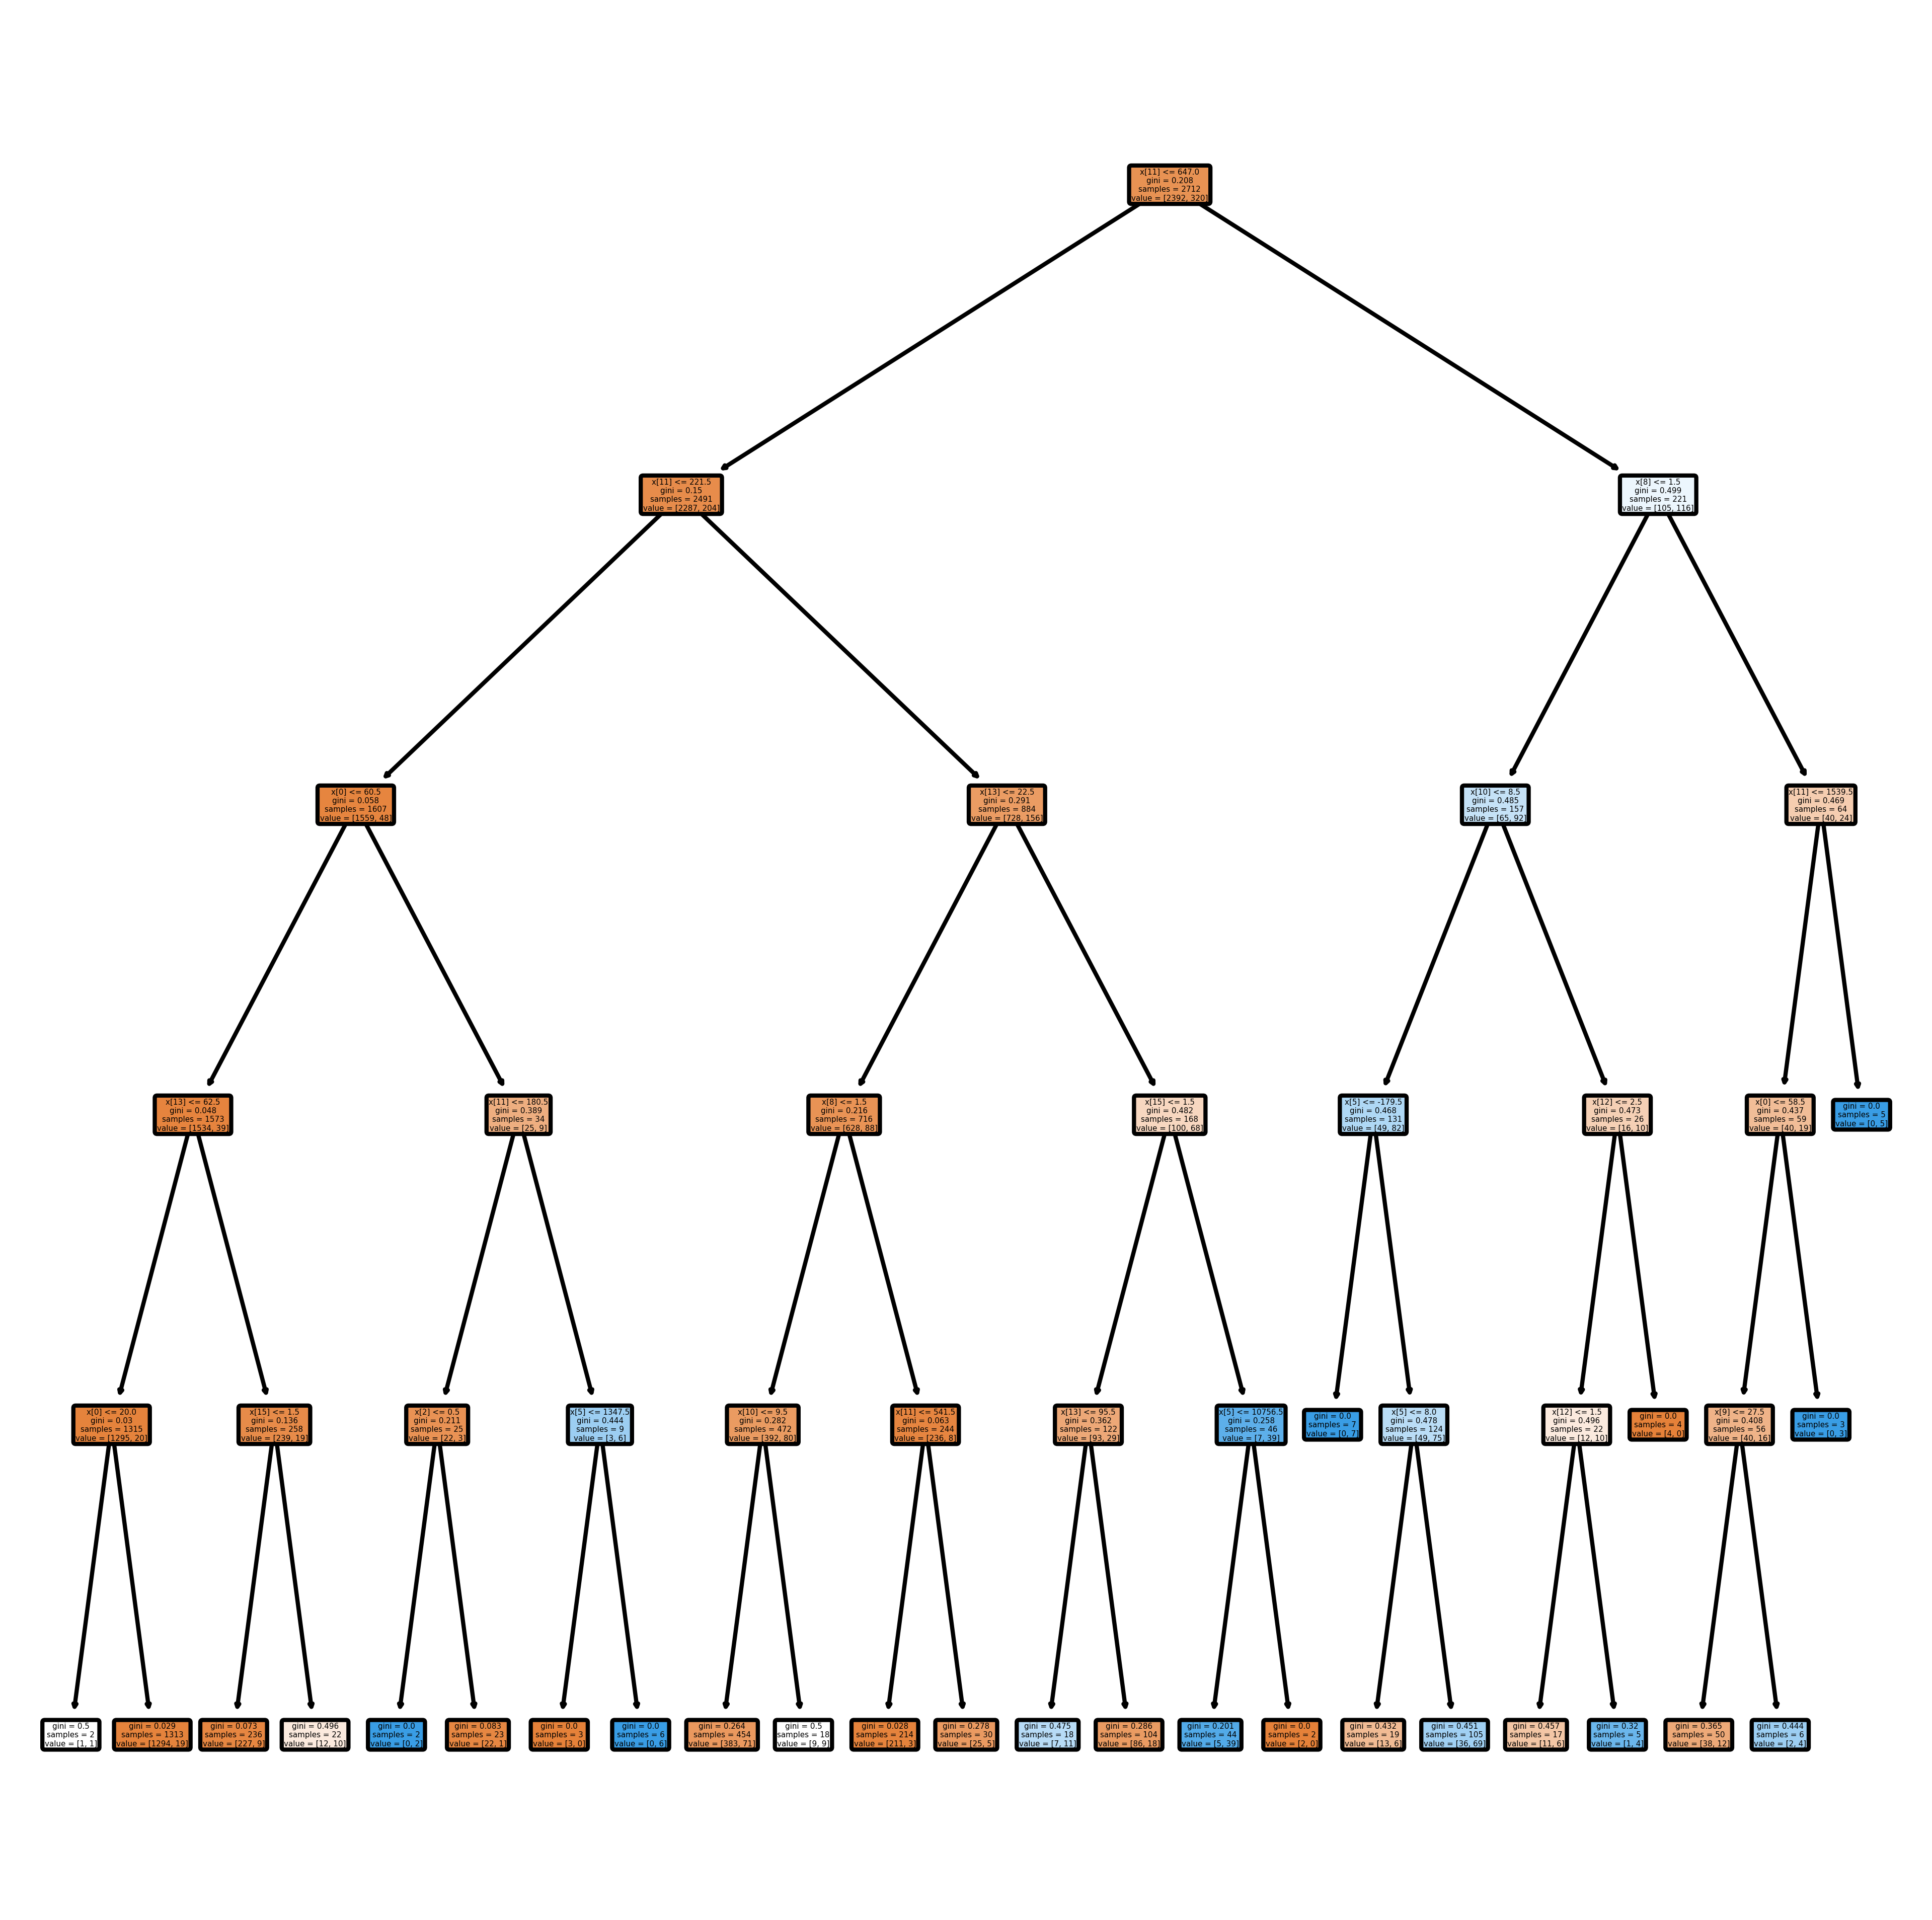

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8), dpi=600)
plot_tree(dtc_1, filled=True, rounded=True, ax=axes)
plt.savefig('tree_1.svg')